<a href="https://colab.research.google.com/github/DuchessDiamond/Portfolio/blob/main/Heather_Diamond_Capstone_Project_Milestone_1_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>Deep Learning Capstone Project: Malaria
### MIT's Applied Data Science Program
### Milestone 1

[Report for Milestone 1](https://docs.google.com/presentation/d/15qccB5mfowSSsACL2VRSvM1tEn4xwGHL1IOy2u1zUfU/edit?usp=sharing)

##<b> Mounting the Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## <b>Libraries</b>

In [2]:
import zipfile
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from PIL import Image

##**Display** **Settings**

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

## <b>Data

In [4]:
path = '/content/drive/MyDrive/Datasets/cell_images.zip'

with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

###Training Images

In [5]:
train_dir = '/content/cell_images/train'

# Normalize the size of all the images to 64
SIZE= 64

# Designation of empty list for the train images.
train_images = []

# Designation of empty list for the train labels. (0 - uninfected, 1 - parasitized)
train_labels = []

In [6]:
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path): 

      try:
            image = Image.open(train_dir + folder_name + image_name)
            image = image.resize((64, 64))
            train_images.append(np.array(image))

            # Creating labels for parasitized (1) and uninfected (0) images.
            if folder_name == '/parasitized/':
            
                train_labels.append(1)
           
            else:
           
                train_labels.append(0)
        
      except Exception:
       
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

###Test Images

In [7]:
test_dir = '/content/cell_images/test'

SIZE = 64

# Designation for the test images empty list.
test_images = []

# Designation for the test labels empty list.
test_labels = []

In [8]:
for folder_name in ['/parasitized/', '/uninfected/']:
    
    images_path = os.listdir(test_dir + folder_name)
    
    for i, image_name in enumerate(images_path):

      try:
            image = Image.open(test_dir + folder_name + image_name)
            image = image.resize((64, 64))
            test_images.append(np.array(image))
            
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

      except Exception:

            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###Shapes of Train and Test Images and Labels

In [9]:
print("\033[1m"'Shape of:\033[0m') # very cool formatting
print('Test Images:', test_images.shape,'\nTest Labels:',test_labels.shape,'\n\nTrain Images:', train_images.shape, '\nTrain Labels:',train_labels.shape)

Shape of:
Test Images: (2600, 64, 64, 3) 
Test Labels: (2600,) 

Train Images: (24958, 64, 64, 3) 
Train Labels: (24958,)


####*Observations and Insights:*
<br>
All of the test and train images are set to the size of 64 x 64 with three channels (RGB). This will allow for adequate comparison of images. 
<br> <br>
The train-test split is about a 90/10. Later, it will need to change  to an 80/10/10, adding a validation set as is current best practice.
<br><br>
Source:
<br>Baheti, Pragati. “Train Test Validation Split: How to &amp; Best Practices [2023].” V7, Microsoft, 3 Jan. 2023, https://www.v7labs.com/blog/train-validation-test-set. 


### Minimum and Maximum Ranges of Pixel Values



In [10]:
print("\033[1m"'Maximum Pixel Values\033[0m \nTrain Images:',np.min(train_images), '\nTest Images',np.max(test_images))
print("\033[1m"'\nMinumum Pixel Values\033[0m \nTrain Images:', np.min(train_images), '\nTest Images', np.max(test_images))

Maximum Pixel Values 
Train Images: 0 
Test Images 255

Minumum Pixel Values 
Train Images: 0 
Test Images 255


#### *Observations and Insights*
<br>
Images can be considered as three matrices, blue, red and green with integer values ranges from 0 to 255. <br><br>There are 255 pixel values representing intensities each channel (RGB) can achieve resulting in 16,777,216 possible colors. 
<br> <br>
This is an eight bit range of values to save computational time and space.
<br> <br>
Source: <br>
“Research Guides: All about Images: What Is Resolution?” What Is Resolution? - All About Images - Research Guides at University of Michigan Library, University of Michigan, 7 July 2022, https://guides.lib.umich.edu/c.php?g=282942&amp;p=1885350. 



###Value Counts for Images

In [11]:
train_value_counts = pd.Series(train_labels).value_counts()
test_value_counts = pd.Series(test_labels).value_counts()

print("\033[1m"'\u001b[1mTrain Labels:\033[0m')
print(train_value_counts)

print('\n\033[1mTest Labels:\033[0m')
print(test_value_counts)

Train Labels:
1    12582
0    12376
dtype: int64

Test Labels:
1    1300
0    1300
dtype: int64


###Normalizing the Images

In [12]:
train_images_normed = ((train_images)/255).astype('float32')

test_images_normed= ((test_images)/255).astype('float32')

####*Observations and Insights:*
<br>
The train and test sets of data are almost evenly divided into parasitic and uninfected cells.  <br>
*   Parasitic Train Labels: 44% <br>
*   Uninfected Train Labels: 45% <br>
*   Parasitic Test Labels: .5% <br>
*   Uninfected Test Labels: .5% <br>
<br>
During the next step the train images can be augmented to get a perfectly even 45% on each.


###Data Balance Check

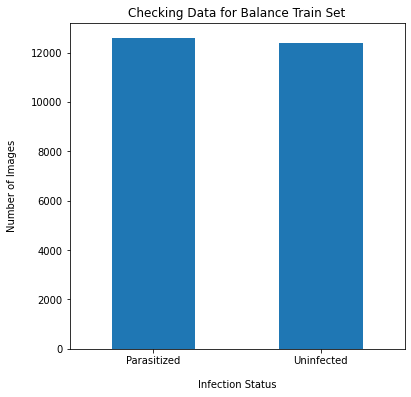

In [13]:
ax = plt.axes()
train_value_counts.plot(kind = 'bar', figsize = (6,6), rot =0)
plt.xlabel("Infection Status", labelpad=14)
plt.ylabel("Number of Images", labelpad=14)
plt.title("Checking Data for Balance Train Set")
ax.set_xticklabels(['Parasitized', 'Uninfected'])
plt.show()


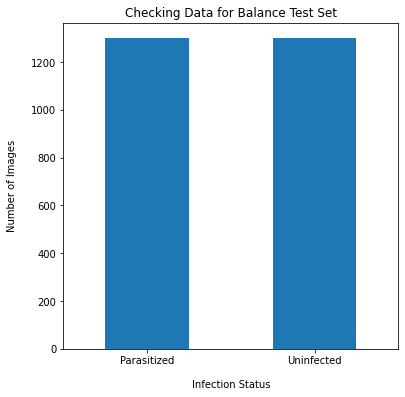

In [14]:
ax = plt.axes()
test_value_counts.plot(kind = 'bar', figsize = (6,6), rot =0)
plt.xlabel("Infection Status", labelpad=14)
plt.ylabel("Number of Images", labelpad=14)
plt.title("Checking Data for Balance Test Set")
ax.set_xticklabels(['Parasitized', 'Uninfected'])
plt.show()

####*Observations and Insights:*
The number of images is relatively balanced, therefore we can use accuracy as a measure of efficacy. 

## <b>Visual Exploration of Data


### Visual Evaluation of Train Images

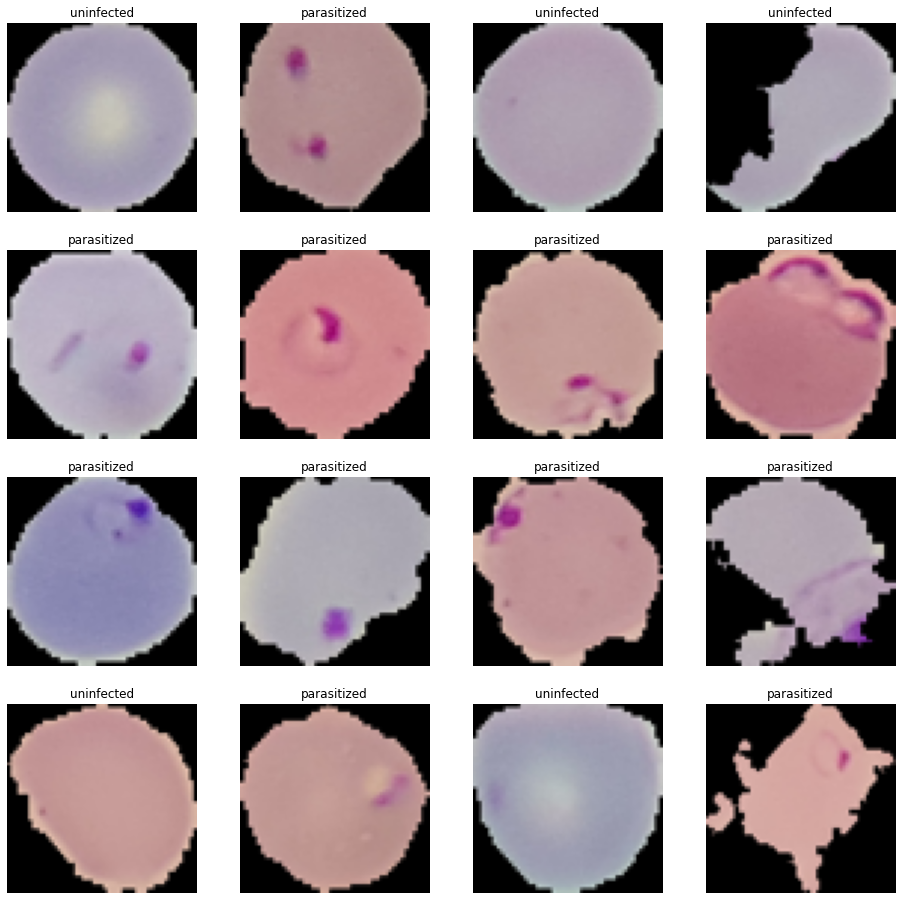

In [15]:
plt.figure(1, figsize = (16 , 16))

for n in range(1, 17):

    plt.subplot(4, 4, n)

    index = int(np.random.randint(0, train_images_normed.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

#### *Observations and Insights*
The parasitized cells' nucleus have a ring that is edged with a darker color. The uninfected cells have a more rounded shape without peninsulas.

### Alternate Visual Evaluation of Train Images

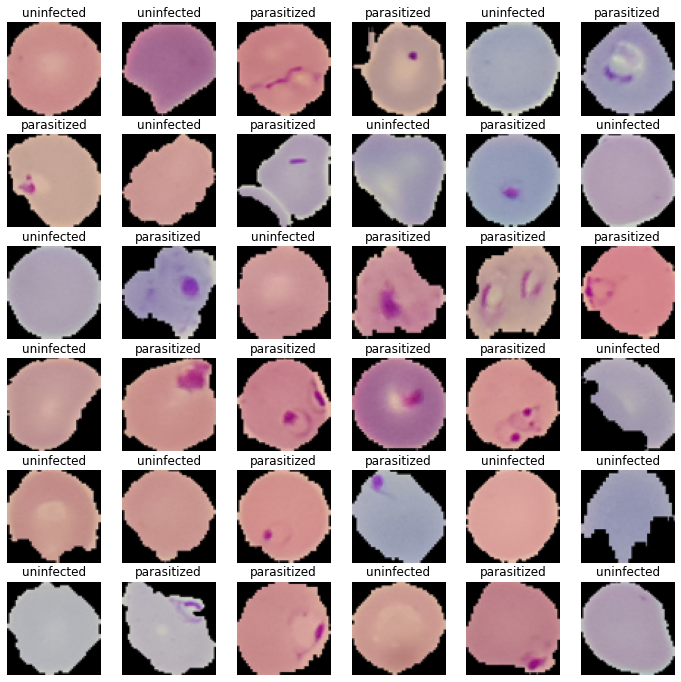

In [16]:
np.random.seed(42)

plt.figure(1, figsize = (12 , 12))

for n in range(1, 37):

    plt.subplot(6, 6, n)

    index = int(np.random.randint(0, train_images_normed.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')


#### *Observations and Insights:*
 <br> 
The parasitized cells have a ring that is edged with a darker color and a more irregular border.





##<b> Plotting the Mean Images

In [17]:
def find_mean_img(full_mat, title):

    mean_img = np.mean(full_mat, axis = 0)[0]

    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

###Mean Image for Parasitized Cell

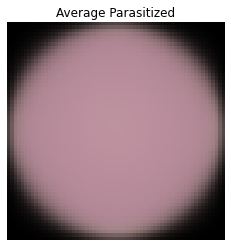

In [18]:
parasitized_data = [] 

for img, label in zip(train_images_normed, train_labels):

        if label == 1:
              
              parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized') 

###Mean Image for Uninfected Cell

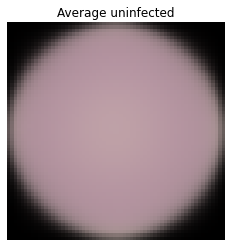

In [19]:
uninfected_data = []  

for img, label in zip(train_images_normed, train_labels):

        if label == 0:
              
              uninfected_data.append([img])          

uninfected_mean = find_mean_img(np.array(uninfected_data), 'uninfected')

####  *Observations and Insights*
<br>
The Mean Parasitized cell is darker pink in hue.
This is due to the dark clustring that we find in the parasitized cells. The averages of these clusterings results in an overall darker image than the uninfected cells.


## <b>Converting RGB to HSV of Images Using OpenCV



##Converting the Train Data

In [20]:
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)

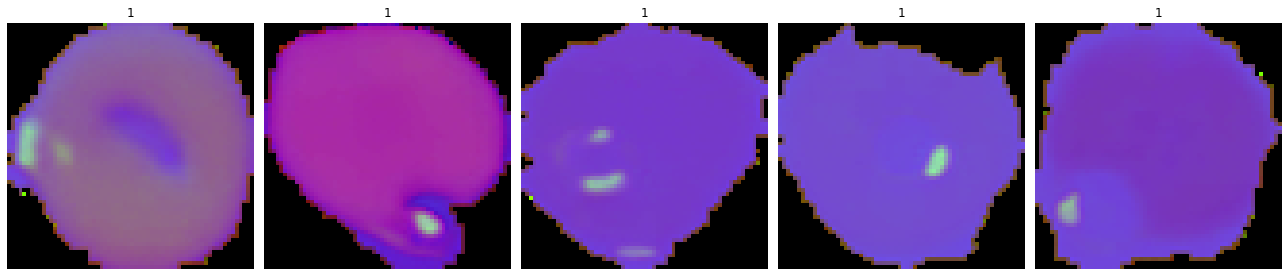

In [21]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

###<b> Converting the test data

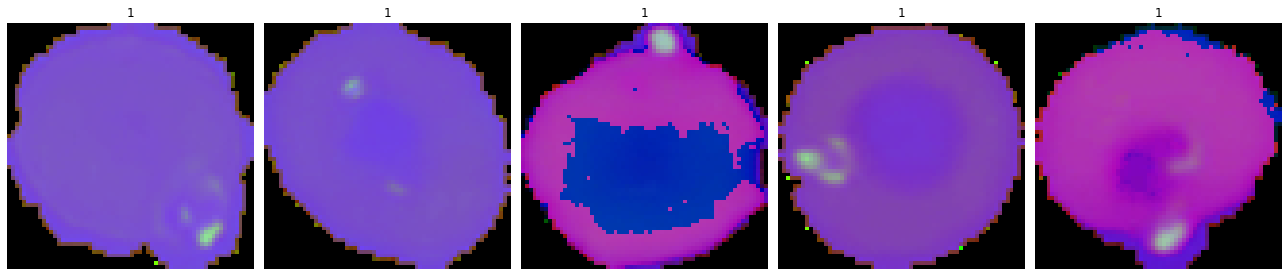

In [22]:
gfx_test=[]  

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)
  
  gfx_test.append(a)

gfx_test = np.array(gfx)

viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

####*Observations and Insights*
<br> There are green highlighted areas which indicate a parasitized cell. 
<br><br>
The shapes' edges are more definitive. 

##<b> Processing Images Using Gaussian Blurring

###Gaussian Blurring on Train Data

In [23]:
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

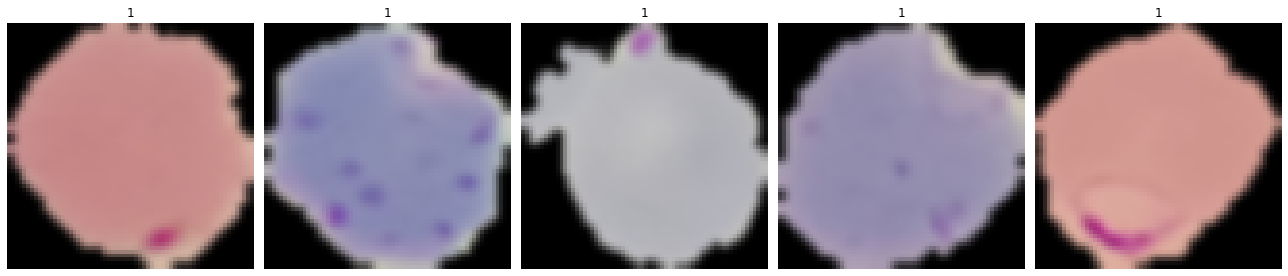

In [24]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

##Gaussian Blurring on Test Data

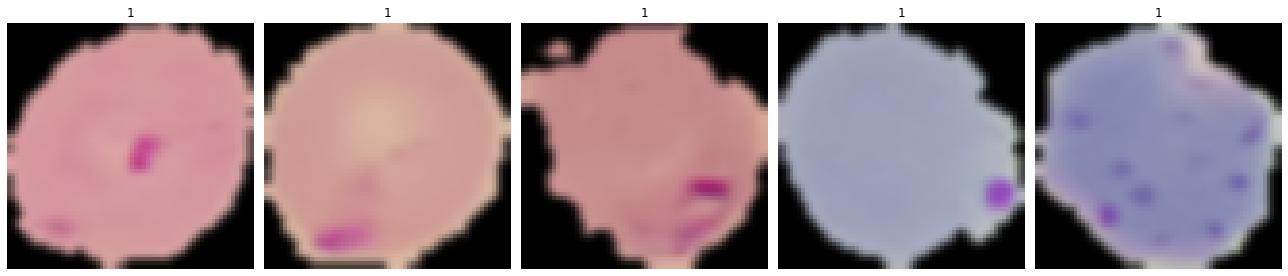

In [25]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

###*Observations and Insights*

After the Gaussian noise is removed, the salient feature of the parasitized cells' color is the darker spots which are indicative of the trophozoite and shizont phases. (See slide #4 in the report.)
